# РОБОТА із ЗОБРАЖЕННЯМИ 
## Файл: Image_06_003
## Морфологічні перетворення. Ерозія (Erode)

In [55]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.color as co
plt.rcParams['font.size'] = 10

In [56]:
# Визначення та друк параметрів зображення
def image_data (image):
    rank     = len(image.shape)
    rows_num = image.shape[0] ## кількість рядків
    clms_num = image.shape[1] ## кількість колонок
    chen_num = 1
    if rank == 3: 
        chen_num = image.shape[2] ## кількість каналів
    print('Опис зображення ')
    print('IMAGE RANK',  rank)
    print('IMAGE SHAPE', image.shape)
    print('DATA Type',   image.dtype)
    return rows_num,clms_num, chen_num

In [57]:
# Відобрадження обраного зображення
def image1_view (image, image_name):
    fig, ax = plt.subplots(figsize=(4, 4))
    plt.title(image_name)
    plt.imshow(image)
    plt.show()
    return 

In [58]:
# Відобрадження двох зображень длчя порівняння
def image2_view (image1, image2, image1_name, image2_name):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()
    ax[0].set_title(image1_name)
    ax[0].imshow(image1)
    ax[1].set_title(image2_name)
    ax[1].imshow(image2)
    plt.show()
    return

Опис зображення 
IMAGE RANK 3
IMAGE SHAPE (200, 200, 3)
DATA Type uint8
BLACK pixels = 32903 WHITE pixels = 7063


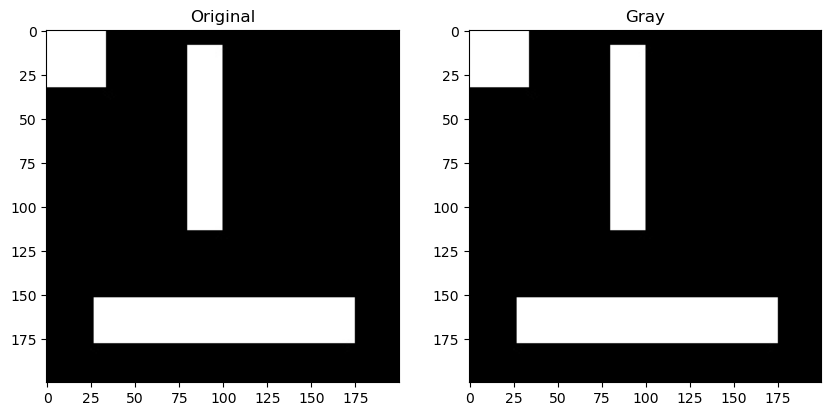

In [59]:
## Завантажуємо зображення вірусів
#filename = 'Virus_1_Color.png' 
#filename = 'Virus_2_.jpg' 
filename = 'Morfo_BW_1.jpg'
#filename = 'Morfo_Cl_test_simpl_1.jpg'
# filename = 'Test_BW_1.png'
path = './IMAGES/'
Original_Im = io.imread(path+filename)

## Визначення стркутури та розміру зображення
rows_num, clms_num, chan = image_data (Original_Im)

## Перетворюємо до сірого
Original_Im_Gray = co.rgb2gray(Original_Im)

## Рахуємо чорні та білі пвкселі
Black = 0
White = 0
for i in  range (rows_num):
    for j in  range (clms_num):
        if Original_Im_Gray [i,j] < 0.01 : Black += 1
        if Original_Im_Gray [i,j] > 0.99 : White += 1
print ('BLACK pixels =',Black, 'WHITE pixels =',White )                  


## Відображення
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()
ax[0].imshow(Original_Im)
ax[0].set_title("Original")
ax[1].imshow(Original_Im_Gray, cmap=plt.cm.gray)
ax[1].set_title("Gray")
plt.show()


#### Формуємо BW зображення

BLACK pixels = 32930 WHITE pixels = 7070


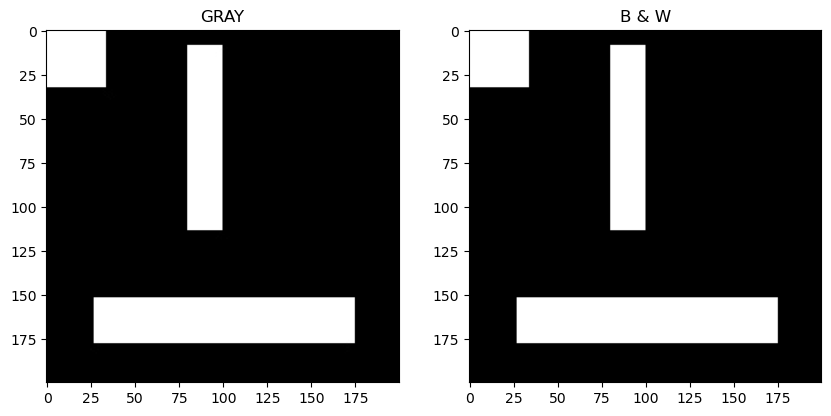

In [60]:
# Поріг зрізу
gamma = 0.3
def bw(l):
    if l < gamma :
        return 0.0
    else:
        return 1.0

Original_Im_BW  = np.zeros ((rows_num , clms_num), dtype=np.float32)
for i in range  (rows_num):
    for j in range (clms_num):
        Original_Im_BW[i,j] = bw (Original_Im_Gray [i,j]) 
      
        
## Рахуємо чорні та білі пікселі
Black = 0
White = 0
for i in  range (rows_num):
    for j in  range (clms_num):
        if Original_Im_BW [i,j] < 0.01 : Black += 1
        if Original_Im_BW [i,j] > 0.99 : White += 1
print ('BLACK pixels =',Black, 'WHITE pixels =',White )                  


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()
ax[0].imshow(Original_Im_Gray, cmap=plt.cm.gray)
ax[0].set_title("GRAY")
ax[1].imshow(Original_Im_BW, cmap=plt.cm.gray)
ax[1].set_title("B & W")
plt.show()


#### Ерозія (erosion)

BLACK pixels = 34280 WHITE pixels = 5720


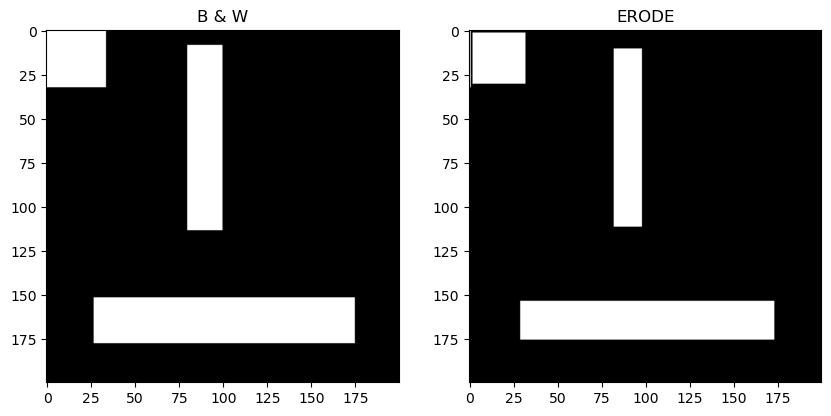

In [69]:
# Структурний елемент квадрат 5 Х 5 
B_row = 5; C_row = 2
B_clm = 5; C_Clm = 2

# Erode_Im_BW  = np.zeros ((rows_num , clms_num), dtype=np.float32)
Erode_Im_BW  = np.copy (Original_Im_BW)

## ERODE
for i in  range (1, (rows_num-C_row), 1):
    for j in  range (1, (clms_num-C_Clm), 1):
        B_all = 0.0
        B_all = Original_Im_BW [i,j]
        B_all = B_all +  Original_Im_BW [i-2,j-1]+Original_Im_BW[i-2,j]+Original_Im_BW[i-2,j+1]
        B_all = B_all +  Original_Im_BW [i+2,j-1]+Original_Im_BW[i+2,j]+Original_Im_BW[i+2,j+1]
        B_all = B_all +  Original_Im_BW [i-1,j-2]+Original_Im_BW[i,j-2]+Original_Im_BW[i+1,j-2]
        B_all = B_all +  Original_Im_BW [i-1,j+2]+Original_Im_BW[i,j+2]+Original_Im_BW[i+1,j+2]
                
        if B_all > 11.99 : # є хочаб 1 чорний
            Erode_Im_BW [i, j] = 1.0
        else: 
            Erode_Im_BW [i, j] = 0.0

## Рахуємо чорні та білі пікселі 
Black = 0
White = 0
for i in  range (rows_num):
    for j in  range (clms_num):
        if Erode_Im_BW [i,j] < 0.01 : Black += 1
        if Erode_Im_BW [i,j] > 0.99 : White += 1
print ('BLACK pixels =',Black, 'WHITE pixels =',White )                    
                    
                    
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()
ax[0].imshow(Original_Im_BW, cmap=plt.cm.gray)
ax[0].set_title("B & W")
ax[1].imshow(Erode_Im_BW, cmap=plt.cm.gray)
ax[1].set_title("ERODE")
plt.show()                  



#### Порівняння (XOR)

WHITE pixels = 1350


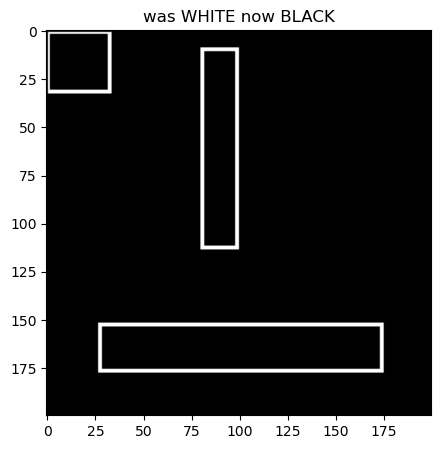

In [70]:
XOR_im = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint8)
White_Pix = 0
for i in  range (rows_num):
    for j in  range (clms_num):
        if Original_Im_BW[i, j] > 0.9 and Erode_Im_BW [i, j] < 0.1 :
            White_Pix += 1
            XOR_im [i, j,:] = 255
          
print ('WHITE pixels =',White_Pix)                    
                  
fig, axes = plt.subplots(1, 1, figsize=(10, 5))            
plt.title('was WHITE now BLACK')
plt.imshow(XOR_im)
plt.show()

### Функція Ерозії

In [74]:
def erode (image) :
    B_row = 3; C_row = 1
    B_clm = 3; C_Clm = 1
    rows_num = image.shape[0] ## кількість рядків
    clms_num = image.shape[1] ## кількість колонок
    Erode_Im = np.zeros ((rows_num , clms_num), dtype=np.float32)
    ## ERODE
    for i in  range (1, (rows_num-C_row), 1):
        for j in  range (1, (clms_num-C_Clm), 1):
            B_all = 0.0
            for l in range (B_row):
                for k in range (B_clm):
                    # Erode: 1 олько если  все 9 = 1
                    B_all += image [i-(C_row-l),j-(C_Clm-k)]
                    if B_all > 8.99 :
                        Erode_Im [i, j] = 1.0
                    else: 
                        Erode_Im [i, j] = 0.0
    return Erode_Im


In [75]:
Erode_1 =  erode(Original_Im_BW)
Erode_2 =  erode(Erode_1)
Erode_3 =  erode(Erode_2)
Erode_4 =  erode(Erode_3)
Erode_5 =  erode(Erode_4)


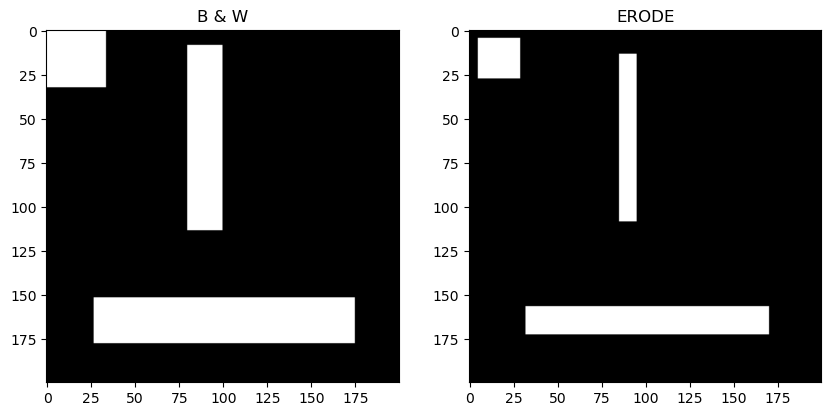

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()
ax[0].imshow(Original_Im_BW, cmap=plt.cm.gray)
ax[0].set_title("B & W")
ax[1].imshow(Erode_5, cmap=plt.cm.gray)
ax[1].set_title("ERODE")
plt.show()      

In [77]:
XOR_img = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint8)
White_Pix = 0
for i in  range (rows_num):
    for j in  range (clms_num):
        if Original_Im_BW[i, j] > 0.9 and Erode_5 [i, j] < 0.1 :
            White_Pix += 1
            XOR_img [i, j, :] = 255           
print (White_Pix)

3360


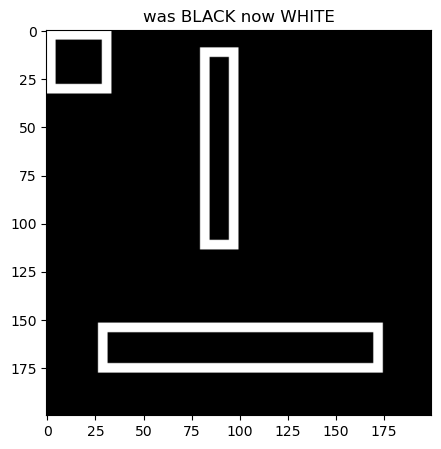

In [78]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))            
plt.title('was BLACK now WHITE')
plt.imshow(XOR_img)
plt.show()

In [79]:
my_foo = erode

In [80]:
def many_foo (n, my_foo, image_start):
    im = image_start.copy()
    for i in range (n):
        print (i)
        im = my_foo(im)
    return (im)

In [81]:
im_answer = many_foo (3, my_foo, Original_Im_BW)

0
1
2


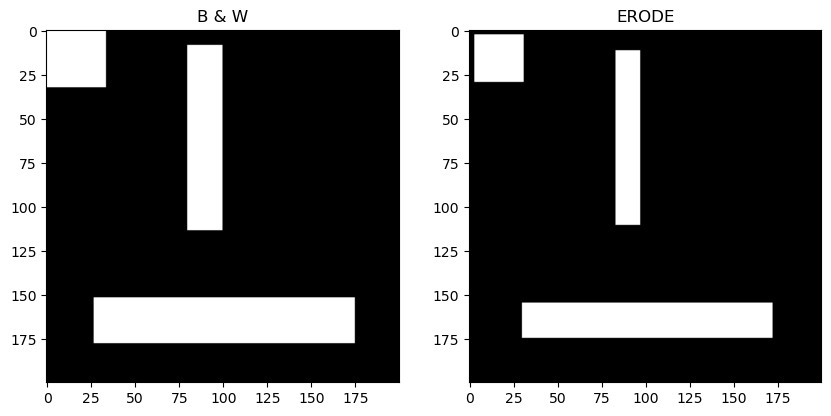

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()
ax[0].imshow(Original_Im_BW, cmap=plt.cm.gray)
ax[0].set_title("B & W")
ax[1].imshow(im_answer, cmap=plt.cm.gray)
ax[1].set_title("ERODE")
plt.show()   

In [82]:
XOR_img = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint8)
White_Pix = 0
for i in  range (rows_num):
    for j in  range (clms_num):
        if Original_Im_BW[i, j] > 0.9 and im_answer [i, j] < 0.1 :
            White_Pix += 1
            XOR_img [i, j, :] = 255           
print (White_Pix )

2088


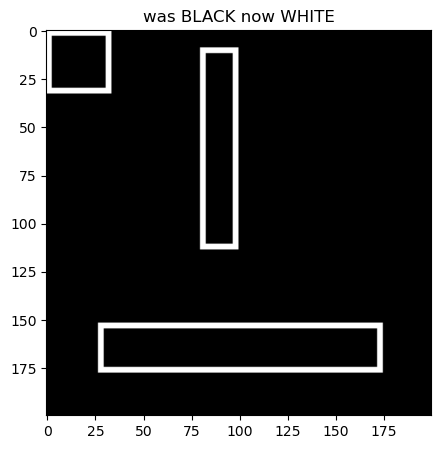

In [83]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))            
plt.title('was BLACK now WHITE')
plt.imshow(XOR_img)
plt.show()